# Second Assignment: Risk & Portfolio Management

In [131]:
import numpy as np;
import matplotlib.pyplot as plt;
import pandas as pd;
import yfinance
from scipy.optimize import minimize


# Step 1 - understand the math behind

Your target: find the most optimized **efficient frontier**.

### Understand Markowitz's Modern Portfolio Theory

**Modern Portfolio Theory (MPT)**, developed by Harry Markowitz, is a **framework for constructing optimal investment portfolios** by <u>considering the trade-off between risk and return</u>. MPT emphasizes the importance of diversification across different asset classes, such as stocks, bonds, and other financial instruments, to reduce overall portfolio risk by spreading investments across various assets with different risk and return characteristics.

### Understand efficient frontier

**Efficient Frontier** - The efficient frontier is a concept in portfolio theory that represents **the set of optimal portfolios** offering the <u>highest expected return</u> for a defined level of risk

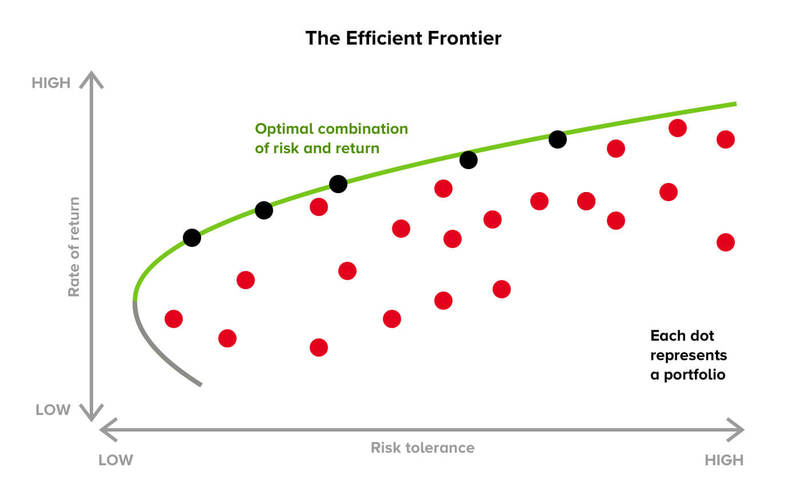

### Understand Sharpe Ratio

**Risk-adjusted return** - amount you earned relatively to the amount of risk made during the period

**Rate return** - percentage of profit or loss on an investment over a specific period of time

**Risk-free rate of return** - theoretical rate of return of an investment with zero risk

**Standard deviation in investing** is a measure of volatility concerning investment returns. It quantifies how much an investment's returns can vary from its average return, indicating the level of risk associated with the investment.

**Sharpe Ratio** - **type of risk-adjusted return**. It is calculated as the difference between the <u>portfolio's return</u> and the <u>risk-free rate</u>, divided by the <u>portfolio's standard deviation (volatility)</u>. 

**A higher Sharpe Ratio indicates better risk-adjusted performance.** The formula is:

$$
Sharpe\ Ratio = \frac{E[R_p] - R_f}{\sigma_p}
$$

Where:
- $E[R_p]$ = Expected portfolio return
- $R_f$ = Risk-free rate
- $\sigma_p$ = Portfolio standard deviation (volatility)



### Connection between Sharpe Ratio and efficient frontier
The Sharpe Ratio is maximized at the point of tangency (touch) between the efficient frontier and the **capital market line (CML)**. This point represents the optimal portfolio, where the risk-return tradeoff is most favorable. By maximizing the Sharpe Ratio, investors can identify the portfolio that provides the best possible return for a given level of risk, aligning with the principles of the efficient frontier.

**The Capital Market Line (CML)** is a graphical representation that shows the relationship between the risks and returns of different portfolios. It links the risk-free rate of return with a portfolio composed of risky assets, illustrating the optimal risk-return combinations for portfolios that include a risk-free asset and a market portfolio.



**CML example**

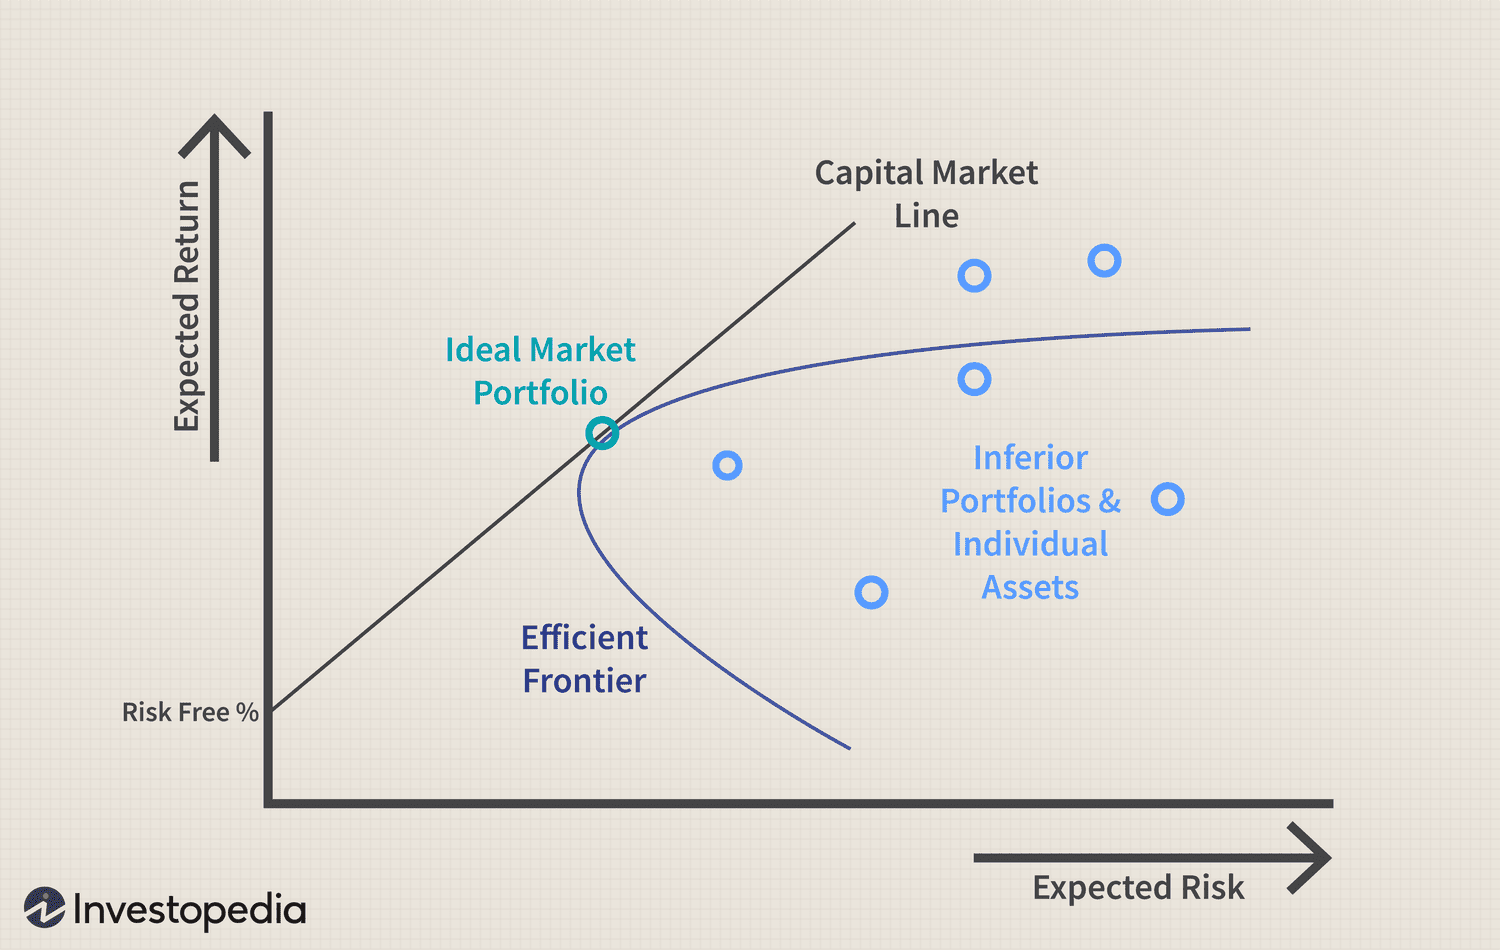

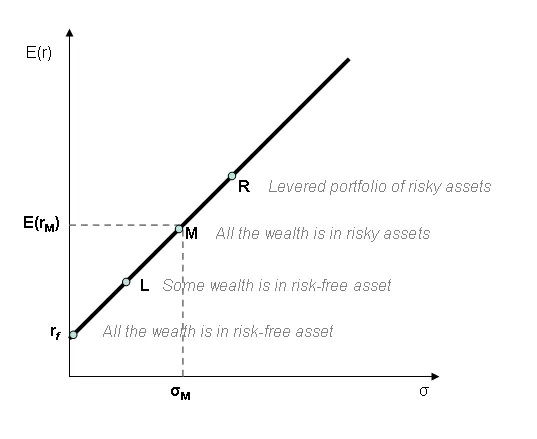

### Understand Expected return of asset
The **expected return** of an asset $$i$$ can be calculated in a few different ways, but the most common approach is to use **historical data** to estimate the average return over a period. Here’s how you can calculate the expected return of an asset using historical price data:

$$E(R_i) = \frac{1}{T} \sum_{t=1}^{T} R_{i,t}$$
Where:
- $E(R_i)$ = Expected return of asset $i$
- $T$ = Number of periods (e.g., days, months)
- $R_{i,t}$ = Return of asset $i$ during period $t$

### Calculate daily return
$$R_{i,t} = \frac{P_{i,t} - P_{i,t-1}}{P_{i,t-1}}$$

Where:
- $P_{i,t}$ = Price of asset $i$ at time $t$
- $P_{i,t-1}$ = Price of asset $i$ at time $t-1$
- $R_{i,t}$ = Daily return for asset $i$ at time $t$


### Understand the covariance

**Covariance matrix** of volatility for calculation the **Expected return** is just one of good methods to capture the relationship between prices of assets

# Step 2 - develop required functions

In [159]:
# returns portfolio return, volatility, and Sharpe ratio
def calc_portfolios(expected_returns, cov_matrix, num_portfolios = 10000, risk_free_rate=0.03):
    results = np.zeros((3, num_portfolios))
    weights_record = []

    for i in range(num_portfolios):
        weights = np.random.random(len(expected_returns))
        weights /= np.sum(weights) # normalize weights
        weights_record.append(weights)
        
        portfolio_return = np.dot(weights, expected_returns)
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
        
        results[0, i] = portfolio_return
        results[1, i] = portfolio_volatility
        results[2, i] = sharpe_ratio

    # Extract results
    return results, weights_record

In [ ]:
# displays the efficient frontier and the Capital Market Line and stats about the best portfolio
def stats(returns, volatilities, sharpe_ratios, weights_record, risk_free_rate=0.03):
    # Create a figure with 2 subplots arranged horizontally
    fig, axs = plt.subplots(1, 2, figsize=(20, 6))
    show_frontier(axs[0], fig, volatilities, returns, sharpe_ratios)
    show_frontier(axs[1], fig, volatilities, returns, sharpe_ratios, title='Efficient Frontier with CML')

    tangent_idx = np.argmax(sharpe_ratios)
    tangent_return = returns[tangent_idx]
    tangent_volatility = volatilities[tangent_idx]
    # Draw the CML: line from (0, risk_free_rate) to tangent portfolio (tangent_volatility, tangent_return)
    axs[1].plot([0, tangent_volatility], [risk_free_rate, tangent_return], 'r--', linewidth=2, label='Capital Market Line')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

    show_asset_allocation(weights_record, tangent_idx, tangent_return, tangent_volatility)\
    
    
def show_asset_allocation(weights_record, tangent_idx, tangent_return, tangent_volatility):
    print(f"\nBest Portfolio Risk (Volatility): {tangent_volatility:.2%}")
    print(f"Best Portfolio Return: {tangent_return:.2%}")
    best_weights = weights_record[tangent_idx]
    print("\nBest Portfolio Allocation:")
    for idx, weight in enumerate(best_weights):
        print(f"Stock {idx + 1}: {weight:.2%}")


def show_frontier(ax, fig, volatilities, returns, sharpe_ratios, title='Efficient Frontier'):
    ax.scatter(volatilities, returns, c=sharpe_ratios, cmap='viridis', marker='o')
    cbar_left = fig.colorbar(ax.collections[0], ax=ax)
    cbar_left.set_label('Sharpe Ratio')
    ax.set_xlabel('Volatility (Risk)')
    ax.set_ylabel('Return')
    ax.set_title(title)

# Step 3 - display random portfolio of 3 stocks
Efficiency Frontier, CML and stats

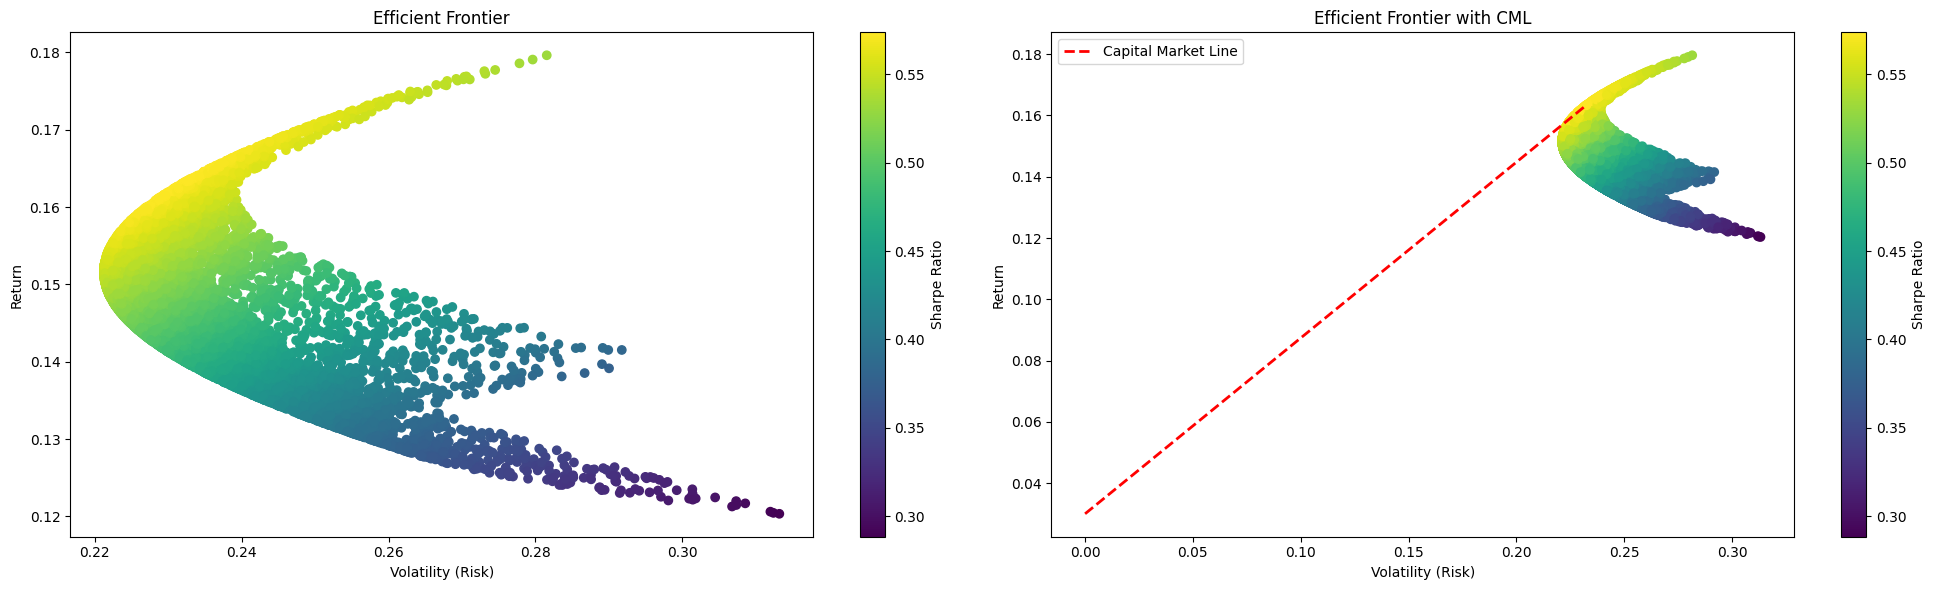


Best Portfolio Risk (Volatility): 23.12%
Best Portfolio Return: 16.27%

Best Portfolio Allocation:
Stock 1: 15.22%
Stock 2: 64.27%
Stock 3: 20.51%


In [122]:
# Example data: expected returns and covariance matrix
random_expected_returns = np.array([0.12, 0.18, 0.14])
random_cov_matrix = np.array([[0.1, 0.02, 0.04],
                       [0.02, 0.08, 0.03],
                       [0.04, 0.03, 0.09]])


[returns, volatilities, sharpe_ratios], weights = calc_portfolios(random_expected_returns, random_cov_matrix)
stats(returns, volatilities, sharpe_ratios, weights)

# Step 4 - get real data from Yahoo Finance

In [ ]:
# Fetch data for AAPL, MSFT, and TSLA
tickers = ['AAPL', 'MSFT', 'TSLA']
data = yf.download(tickers, start="2020-01-01", end="2023-01-01", auto_adjust=True)
price_data = data['Close']

price_data.head()

[                       0%                       ]

[*********************100%***********************]  3 of 3 completed


Ticker,AAPL,MSFT,TSLA
Date,,,
2020-01-02,72.716072,153.323257,28.684000
2020-01-03,72.009117,151.414185,29.534000
2020-01-06,72.582909,151.805481,30.102667
2020-01-07,72.241539,150.421402,31.270666
2020-01-08,73.403641,152.817352,32.809334


In [ ]:
# here pct_change() is used to calculate daily returns and dropna() is used to remove the first row of NaN values
# pct_change() gets the percentage difference of the present value from the previous value
# i.e. from [10, 18, 11] is will be [(NaN-10)/NaN, (18-10) / 10, (11-18)/18] = [NaN, 0.8, -0.3889] 
# hence, the formula is for each cell: (present - previous) / previous
# if the input is a matrix then it will calculate the percentage difference for each column

# dropna() is used to remove the first row of NaN values
daily_returns = price_data.pct_change().dropna() 

expected_daily_returns = daily_returns.mean()  # Mean daily returns for each asset
cov_matrix = daily_returns.cov() 

# Step 5 - find best portfolio

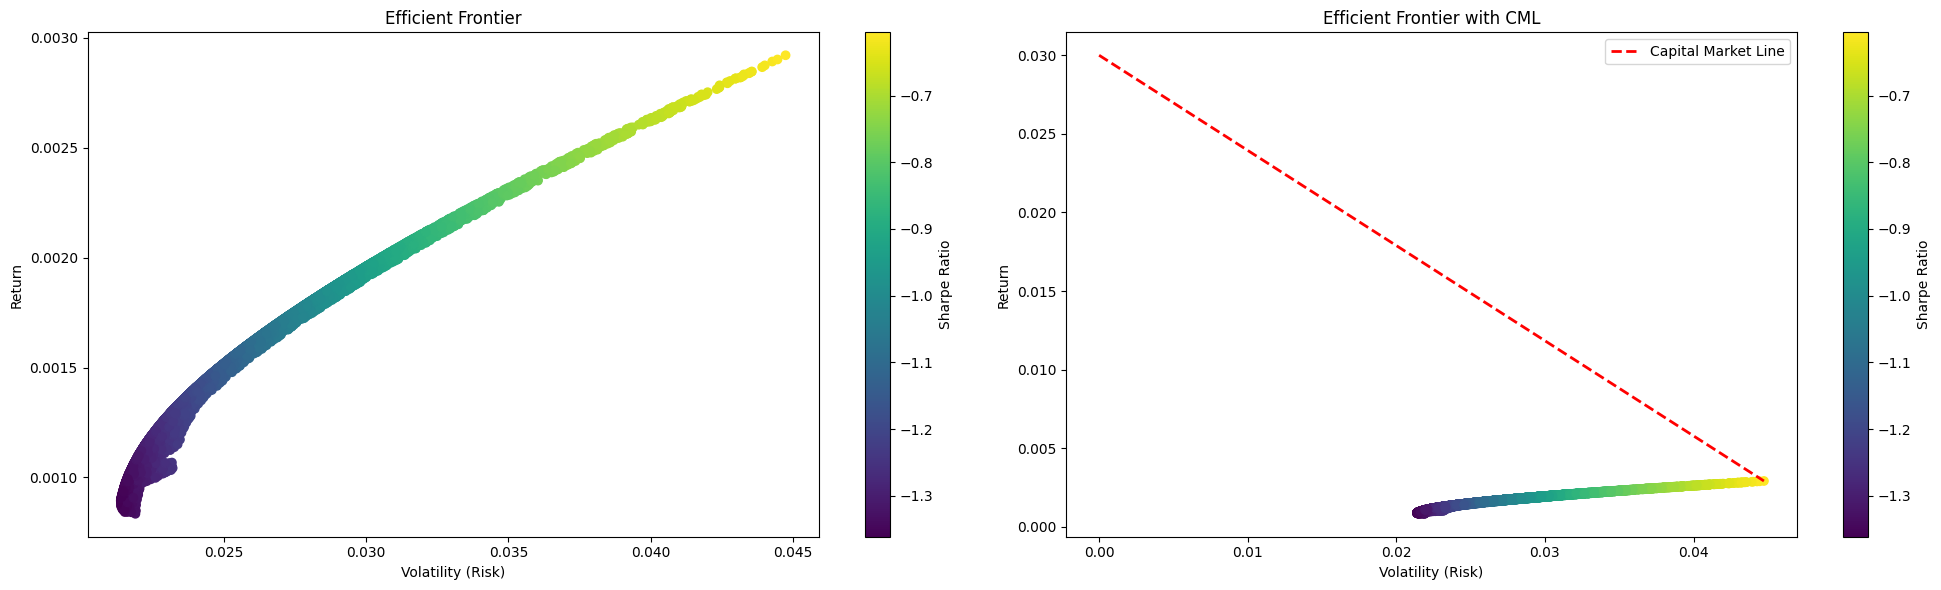


Best Portfolio Risk (Volatility): 4.47%
Best Portfolio Return: 0.29%

Best Portfolio Allocation:
Stock 1: 2.03%
Stock 2: 0.17%
Stock 3: 97.79%


In [ ]:
[returns, volatilities, sharpe_ratios], weights = calc_portfolios(expected_daily_returns, cov_matrix)
stats(returns, volatilities, sharpe_ratios, weights)

# Step 6 - Use optimization

In [ ]:

def neg_sharpe_ratio(weights, expected_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio

def weight_sum_constraint(weights):
    return np.sum(weights) - 1

num_assets = len(tickers)
args = (expected_daily_returns, cov_matrix, 0.01)
constraints = ({'type': 'eq', 'fun': weight_sum_constraint})
bounds = tuple((0, 1) for asset in range(num_assets))
result = minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                  method='SLSQP', bounds=bounds, constraints=constraints)

result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.1547129765678005
       x: [ 1.943e-16  0.000e+00  1.000e+00]
     nit: 3
     jac: [-6.363e-02 -5.508e-02 -2.199e-01]
    nfev: 12
    njev: 3

# Step 7 - Conclude results

In [137]:
optimal_weights = result.x
expected_portfolio_return = np.dot(optimal_weights, expected_daily_returns)
expected_portfolio_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))
sharpe_ratio = (expected_portfolio_return - 0.01) / expected_portfolio_volatility

print(f"Optimal portfolio weights:")
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {optimal_weights[i]:.4f}")

print(f"\nPortfolio Metrics:")
print(f"Expected Return: {expected_portfolio_return:.4f}")
print(f"Expected Volatility: {expected_portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {-sharpe_ratio:.4f}")

Optimal portfolio weights:
AAPL: 0.0000
MSFT: 0.0000
TSLA: 1.0000

Portfolio Metrics:
Expected Return: 0.0030
Expected Volatility: 0.0455
Sharpe Ratio: 0.1547


## Interpretation

These results represent the portfolio allocation that maximizes the Sharpe ratio.

The optimization suggests that investing primarily in TSLA would give the best
risk-adjusted return based on the historical data from 2020-2023.

The near-zero weights for AAPL and MSFT indicate that including these stocks
would not improve the risk-adjusted return compared to investing only in TSLA.

This is likely because MSFT had a better balance of return vs. volatility during this period.